In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df = pd.read_csv("/content/app_rev.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGX8nwMzgSrVsa66IBwsM5BF3nA2U6ZSbYm02Y...,Dahana Project,https://play-lh.googleusercontent.com/--JjdFbx...,Nice apps. User experiencenya improve banget. ...,5,1,NaN,2020-10-02 04:15:42,NaN,NaN
1,gp:AOqpTOFDoQrpT4NsatS2MyYZvwFQDYjaB2FjvJYgusV...,Marwan Gunawan,https://play-lh.googleusercontent.com/a-/AOh14...,Bad apps Cannot login cannot do anything,1,3,3.1.8,2020-07-27 04:55:40,NaN,NaN
2,gp:AOqpTOGLoloxc0RO09nU7OQ-wvxocVZe9JJMN9iNCw-...,dhani may,https://play-lh.googleusercontent.com/a-/AOh14...,Can't login to user page,1,1,NaN,2020-10-27 13:44:41,NaN,NaN
3,gp:AOqpTOGQNw5daxZoG4PeYFesv-SfPFi2s7rytWDlBHt...,Herlambang setiawan,https://play-lh.googleusercontent.com/-Ofnx9K9...,Can't sign up.. pls fix it,1,4,3.1.4,2020-07-05 02:28:23,"Halo, kami telah memperbaiki masalah di MTF Go...",2020-07-06 07:31:29
4,gp:AOqpTOEnmY81TEhbVIThAQp2La1QipgtOMRakrF6vRv...,Desti Natalia,https://play-lh.googleusercontent.com/a-/AOh14...,Tolong perbaiki sign up nya! Gabisa sign up. A...,1,4,3.1.5,2020-03-14 15:12:53,NaN,NaN


In [ ]:
def calc_vader_sentiment(text):
    sentiment = 1
    vs = analyzer.polarity_scores(str(text))
    compound = vs['compound']
    if(compound == 0):
        sentiment = -1
    elif(compound >= 0.05):
        sentiment = 2
    elif(compound <= -0.05):
        sentiment = 0
    return sentiment

In [ ]:
df_vs = pd.DataFrame({
    'uid': list(df.index.values),
    'text': df['content'],
    'label': [calc_vader_sentiment(i) for i in df['content']]
})

In [ ]:
df_vs

,uid,text,label
0,0,Nice apps. User experiencenya improve banget. ...,2
1,1,Bad apps Cannot login cannot do anything,0
2,2,Can't login to user page,-1
3,3,Can't sign up.. pls fix it,0
4,4,Tolong perbaiki sign up nya! Gabisa sign up. A...,-1
...,...,...,...
160,160,Lumayan,-1
161,161,Mantaaappppp,-1
162,162,Good job,2
163,163,Loved it,2


In [ ]:
df_vs.to_csv("sentiment_result.csv", encoding='utf8', index=False)

In [ ]:
df_vs[df_vs['label']==2]

,uid,text,label
0,0,Nice apps. User experiencenya improve banget. ...,2
9,9,"Nice uda update, sampe saat ini belom ada masa...",2
10,10,Cannot login. Padahal nasabah autodebet. Katan...,2
13,13,Dah diperbaiki ternyata. Good job. Semoga jadi...,2
15,15,Wow exceptional,2
22,22,Kalo blm ready apps nya.. lebih baik jangan du...,2
26,26,Cacat.. Saya nasabahnya tetapi klik Aksesku di...,2
33,33,"Layout viewnya menarik dan mudah dipahani, ada...",2
36,36,Aplikasi MTF GO ini sangat membantu untuk meng...,2
37,37,"Aplikasi user friendly, banyak pilihan produk ...",2


In [ ]:
df_vs[df_vs['label']==-1]

,uid,text,label
2,2,Can't login to user page,-1
4,4,Tolong perbaiki sign up nya! Gabisa sign up. A...,-1
7,7,"Ga bisa login, muncul sesi habis terus.",-1
8,8,mau login aja susah tong,-1
11,11,fix uninstal..,-1
...,...,...,...
156,156,Tidak perlu repot datang ke cabang atau ketemu...,-1
157,157,Sangat membantu nasabah,-1
159,159,Kerennnnnnmm.,-1
160,160,Lumayan,-1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


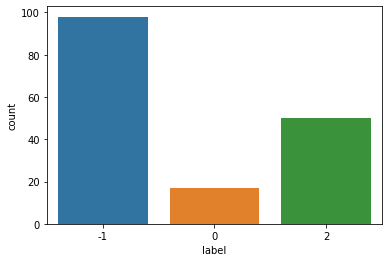

In [ ]:
# label = pd.crosstab(df_vs['label'], normalize='index')
# label

sns.countplot(df_vs['label'])

In [28]:
a = 'This was a good movie.'
k = analyzer.polarity_scores(str(a))
k

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.58, 'pos': 0.42}

In [27]:
co = k['compound']
co

0.4404